In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stat
from tqdm import tqdm

In [2]:
def t_value(sample_size, confidence_level):
    return stat.t.ppf(1-(1-confidence_level)/2, sample_size)

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the Uniform density function
# def uniform_density(x, lower=-2.5, upper=2.5):
#     return np.where((x >= lower) & (x <= upper), 1 / (upper - lower), 0)

# # Define the Bimodal density function
# def bimodal_density(x):
#     return 0.5 * (np.exp(-0.5 * ((x - 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi))) + \
#            0.5 * (np.exp(-0.5 * ((x + 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi)))

# # Define the Skewed density function
# def skewed_density(x):
#     x = x - np.min(x) + 1  # Shift to avoid log issues
#     density = np.exp(-(np.log(x)**2) / 2) / (x * np.sqrt(2 * np.pi))
#     return density / np.max(density)  # Normalize

# # Define the x range
# x = np.linspace(-5, 5, 1000)

# # Calculate the density values
# uniform = uniform_density(x, lower=-2.5, upper=2.5)  # Uniform
# bimodal = bimodal_density(x)  # Bimodal
# skewed = skewed_density(x)  # Skewed

# # Plot the density functions
# plt.figure(figsize=(12, 6))

# plt.plot(x, uniform, label='Uniform', color='blue')
# plt.plot(x, bimodal, label='Bimodal', color='green')
# plt.plot(x, skewed, label='Skewed', color='red')

# plt.title('Example Density Functions')
# plt.xlabel('x')
# plt.ylabel('Density')
# plt.legend()
# plt.grid(True)
# plt.savefig('density_functions.png', dpi=300)
# plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

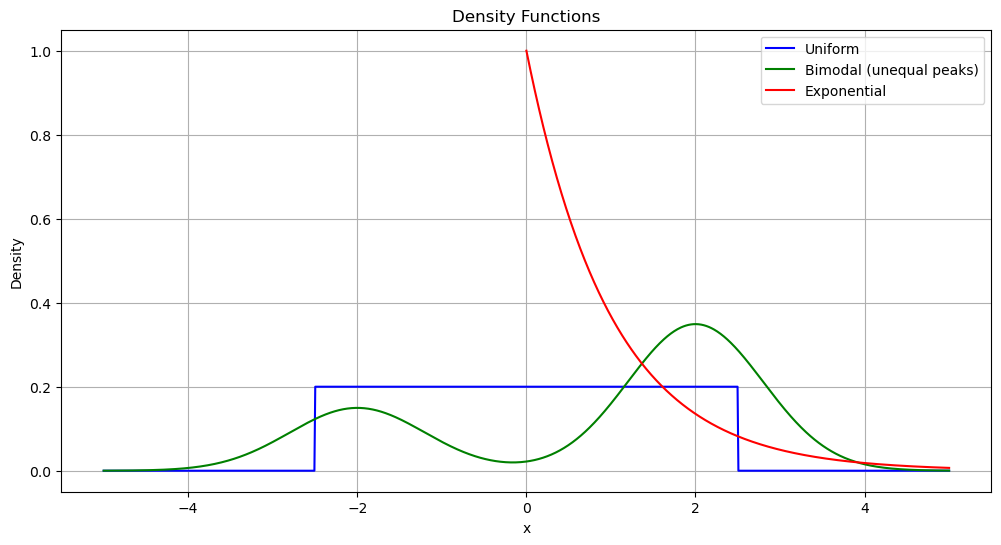

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Uniform density function
def uniform_density(x, lower=-2.5, upper=2.5):
    return np.where((x >= lower) & (x <= upper), 1 / (upper - lower), 0)

# Define the Modified Bimodal density function
def bimodal_density(x):
    peak1 = 0.7 * (np.exp(-0.5 * ((x - 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi)))
    peak2 = 0.3 * (np.exp(-0.5 * ((x + 2) / 0.8)**2) / (0.8 * np.sqrt(2 * np.pi)))
    return peak1 + peak2

# Define the Exponential density function
def exponential_density(x, rate=1):
    return rate * np.exp(-rate * x) * (x >= 0)

# Define the x range
x = np.linspace(-5, 5, 1000)

# Calculate the density values
uniform = uniform_density(x, lower=-2.5, upper=2.5)  # Uniform
bimodal = bimodal_density(x)  # Bimodal with unequal peaks
x_exp = np.linspace(0, 5, 1000)  # Exponential is defined for x >= 0
exponential = exponential_density(x_exp, rate=1)  # Exponential

# Plot the density functions
plt.figure(figsize=(12, 6))

plt.plot(x, uniform, label='Uniform', color='blue')
plt.plot(x, bimodal, label='Bimodal (unequal peaks)', color='green')
plt.plot(x_exp, exponential, label='Exponential', color='red')

plt.title('Density Functions')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('modified_density_functions.png', dpi=300)

# Show the plot
plt.show


In [7]:
def accept_reject(pdf, desired_sample):
    x_values = np.linspace(-5, 5, 10000)
    y_values = [pdf(x) for x in x_values]
    M = np.max(y_values)
    samples = []
    while len(samples) < desired_sample:
        z_i = np.random.uniform(0, M)
        x_i = np.random.uniform(-5, 5)
        if z_i < pdf(x_i):
            samples.append(x_i)

    return samples

In [18]:
Distribution = [uniform_density, bimodal_density, exponential_density]
names = ['uniform', 'bimodal', 'exponential']
expected_values = [0, 0.8, 1]
sample_sizes = [10, 20, 30, 40, 50]
iterations = 1000
results = [] # will contain (dist, size, coverage) tuples

for dist, expected_val, name in zip(Distribution, expected_values, names):
    for size in sample_sizes:
        coverage = 0.0
        tvalue = t_value(size, 0.95)
        for j in tqdm(range(iterations)):
            if name == 'exponential':
                sample = np.random.exponential(scale=1, size=size)
                print(name)
            else:
                sample = accept_reject(dist, size)
            mean = np.mean(sample)
            std = np.std(sample)
            lower_bound = mean - tvalue*(std/np.sqrt(size))
            upper_bound = mean + tvalue*std/np.sqrt((size))
            if expected_val > lower_bound and expected_val < upper_bound:
                coverage += 1
        coverage_prob = coverage/iterations
        results.append((name, size, coverage_prob))
        print(results)
        print('---')

100%|██████████| 1000/1000 [00:15<00:00, 63.34it/s]


[('uniform', 10, 0.933)]
---


100%|██████████| 1000/1000 [00:15<00:00, 65.34it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947)]
---


100%|██████████| 1000/1000 [00:14<00:00, 67.87it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95)]
---


100%|██████████| 1000/1000 [00:15<00:00, 64.82it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95), ('uniform', 40, 0.952)]
---


100%|██████████| 1000/1000 [00:15<00:00, 66.13it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95), ('uniform', 40, 0.952), ('uniform', 50, 0.962)]
---


100%|██████████| 1000/1000 [00:23<00:00, 43.26it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95), ('uniform', 40, 0.952), ('uniform', 50, 0.962), ('bimodal', 10, 0.914)]
---


100%|██████████| 1000/1000 [00:23<00:00, 43.12it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95), ('uniform', 40, 0.952), ('uniform', 50, 0.962), ('bimodal', 10, 0.914), ('bimodal', 20, 0.927)]
---


100%|██████████| 1000/1000 [00:23<00:00, 42.75it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95), ('uniform', 40, 0.952), ('uniform', 50, 0.962), ('bimodal', 10, 0.914), ('bimodal', 20, 0.927), ('bimodal', 30, 0.943)]
---


100%|██████████| 1000/1000 [00:23<00:00, 42.52it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95), ('uniform', 40, 0.952), ('uniform', 50, 0.962), ('bimodal', 10, 0.914), ('bimodal', 20, 0.927), ('bimodal', 30, 0.943), ('bimodal', 40, 0.949)]
---


100%|██████████| 1000/1000 [00:26<00:00, 37.32it/s]


[('uniform', 10, 0.933), ('uniform', 20, 0.947), ('uniform', 30, 0.95), ('uniform', 40, 0.952), ('uniform', 50, 0.962), ('bimodal', 10, 0.914), ('bimodal', 20, 0.927), ('bimodal', 30, 0.943), ('bimodal', 40, 0.949), ('bimodal', 50, 0.941)]
---


100%|██████████| 1000/1000 [00:00<00:00, 59234.89it/s]


exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
expo

100%|██████████| 1000/1000 [00:00<00:00, 63886.92it/s]


exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
expo

100%|██████████| 1000/1000 [00:00<00:00, 58617.32it/s]


exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
expo

100%|██████████| 1000/1000 [00:00<00:00, 44482.08it/s]


exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
expo

100%|██████████| 1000/1000 [00:00<00:00, 57978.02it/s]

exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
exponential
expo

In [33]:
df = pd.DataFrame(results, columns=['Distribution', 'Sample Size', 'Observed Coverage'])

df['Observed Coverage'] = df['Observed Coverage'].apply(lambda x: f"{x * 100:.1f}%")

In [35]:
df.sort_values(by='Sample Size').reset_index(drop=True)

,Distribution,Sample Size,Observed Coverage
0,uniform,10,93.3%
1,bimodal,10,91.4%
2,exponential,10,87.3%
3,uniform,20,94.7%
4,bimodal,20,92.7%
5,exponential,20,91.6%
6,uniform,30,95.0%
7,bimodal,30,94.3%
8,exponential,30,92.3%
9,uniform,40,95.2%


In [24]:
from IPython.display import HTML

# Example DataFram

# Display DataFrame centered
HTML(df.to_html(index=False, justify='center', border=0))

Distribution,Sample Size,Observed Coverage
uniform,10,0.933
uniform,20,0.947
uniform,30,0.950
uniform,40,0.952
uniform,50,0.962
bimodal,10,0.914
bimodal,20,0.927
bimodal,30,0.943
bimodal,40,0.949
bimodal,50,0.941


In [25]:
df.style.set_table_styles(
    [{'selector': 'table', 'props': [('margin-left', 'auto'), ('margin-right', 'auto')]}]
)

,Distribution,Sample Size,Observed Coverage
0,uniform,10,0.933000
1,uniform,20,0.947000
2,uniform,30,0.950000
3,uniform,40,0.952000
4,uniform,50,0.962000
5,bimodal,10,0.914000
6,bimodal,20,0.927000
7,bimodal,30,0.943000
8,bimodal,40,0.949000
9,bimodal,50,0.941000


Mean of means: 10.002485035185364


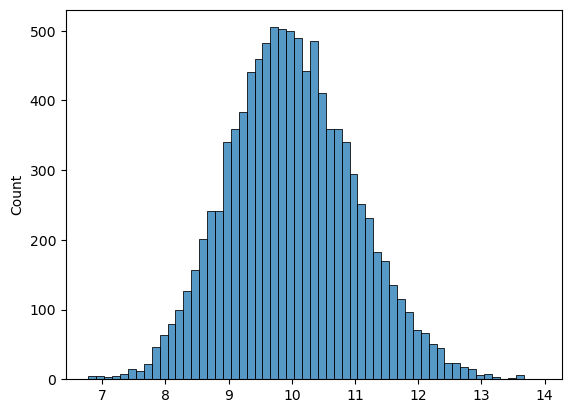

In [75]:
iterations = 10000
means = []

for j in range(iterations):
    sample = np.random.exponential(scale=10, size=100)
    means.append(np.mean(sample))
sns.histplot(means)
print(f'Mean of means: {np.mean(means)}')

# import scipy.stats as st

# st.shapiro(means)

t-based: (9.333123097564934, 10.549247512705906)
Bootstrapped: (9.344327055021507, 10.55181104335386)


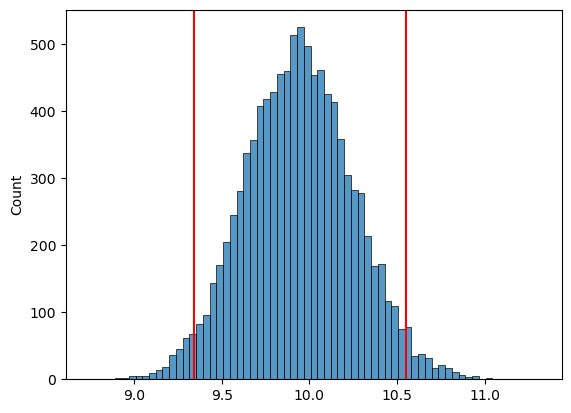

In [100]:
sample_size = 1000
small_sample = np.random.exponential(scale=10, size=sample_size)

from random import choices

iterations = 10000
boot_means = []

for j in range(iterations):
    b_sample = choices(small_sample, k=1000)
    boot_means.append(np.mean(b_sample))


two_five = np.percentile(boot_means, 2.5)
nine_sev = np.percentile(boot_means, 97.5)
sns.histplot(boot_means)
plt.axvline(two_five, color='red')
plt.axvline(nine_sev, color='red')

s_mean = np.mean(small_sample)
s_std = np.std(small_sample)
t_val = t_value(sample_size, .95)

lower = s_mean - t_val*s_std/np.sqrt(sample_size)
upper = s_mean + t_val*s_std/np.sqrt(sample_size)

print(f't-based: {(lower, upper)}')
print(f'Bootstrapped: {(two_five, nine_sev)}')

In [153]:
from tqdm import tqdm 
# coverage vs width for sample size of 10 vs 100 vs 1000

sample_sizes = [10, 100, 1000]

# for each sample, calc t-based CI and Bootstrap based

iterations = 1000

coverage_reg = []
width_reg = []

coverage_boot = []
width_boot = []

for sample_size in sample_sizes:
    running_coverage_reg = 0.0
    running_coverage_boot = 0.0
    running_width_reg = 0.0
    running_width_boot = 0.0
    lens_reg = 0.0
    lens_boot = 0.0
    for j in tqdm(range(iterations)):
        sample = np.random.exponential(scale=10, size=sample_size)

        # reg option
        s_mean = np.mean(sample)
        s_std = np.std(sample)
        t_val = t_value(10, .95)

        lower = s_mean - t_val*s_std/np.sqrt(sample_size)
        upper = s_mean + t_val*s_std/np.sqrt(sample_size)

        if lower < 10 and upper > 10:
            running_coverage_reg += 1
            width = upper - lower
            running_width_reg += width
            lens_reg += 1
        
        # bootstrap
        boot_means = []
        for j in range(iterations):
            b_sample = choices(sample, k=sample_size)
            boot_means.append(np.mean(b_sample))
        
        
        two_five = np.percentile(boot_means, 2.5)
        nine_sev = np.percentile(boot_means, 97.5)

        if two_five < 10 and nine_sev > 10:
            running_coverage_boot += 1
            width = nine_sev - two_five
            running_width_boot += width
            lens_boot += 1
        
    coverage_reg.append(running_coverage_reg/1000)
    coverage_boot.append((running_coverage_boot/1000))
    width_reg.append((running_width_reg/lens_reg, sample_size))
    width_boot.append((running_width_boot/lens_boot, sample_size))


df = pd.DataFrame()

length = 0
for j in range(3):
    width_r, size = width_reg[j]
    width_b, s_size = width_boot[j]
    df.loc[length, 'width'] = width_r
    df.loc[length, 'size'] = size
    df.loc[length, 'coverage'] = coverage_reg[j]
    df.loc[length, 'type'] = 'reg'
    length += 1
    df.loc[length, 'width'] = width_b
    df.loc[length, 'size'] = s_size
    df.loc[length, 'coverage'] = coverage_boot[j]
    df.loc[length, 'type'] = 'boot'
    length += 1
df
        

100%|██████████| 1000/1000 [02:02<00:00,  8.19it/s]


,width,size,coverage,type
0,13.143090,10.0,0.869,reg
1,11.313712,10.0,0.841,boot
2,4.380789,100.0,0.960,reg
3,3.826829,100.0,0.944,boot
4,1.407237,1000.0,0.969,reg
5,1.232940,1000.0,0.950,boot


In [150]:
width_boot

[(11.240967171672308, 10),
 (3.8585967520922266, 100),
 (1.231566027304699, 1000)]

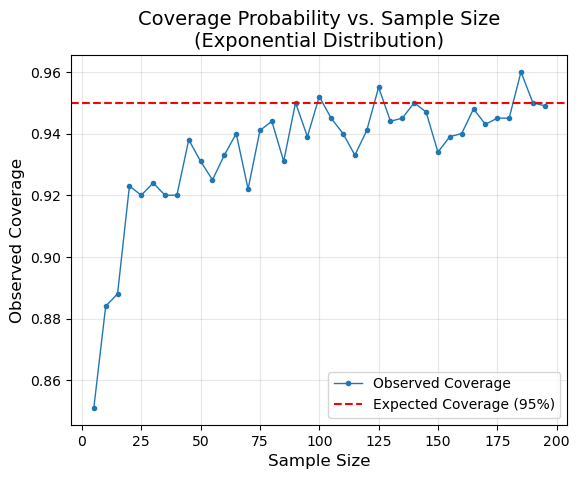

In [72]:
sample_sizes = list(range(5, 200, 5))

coverages = []
iterations = 1000
for size in sample_sizes:
    coverage = 0.0
    tvalue = t_value(size, 0.95)
    for j in range(iterations):
        sample = np.random.exponential(scale=1, size=size)
        mean = np.mean(sample)
        std = np.std(sample)
        lower_bound = mean - tvalue*(std/np.sqrt(size))
        upper_bound = mean + tvalue*std/np.sqrt((size))
        if 1 > lower_bound and 1 < upper_bound:
            coverage += 1
    coverage_prob = coverage/iterations
    coverages.append(coverage_prob)

plt.plot(sample_sizes, coverages,  marker='o', markersize=3, linewidth=1, label="Observed Coverage")

# Add labels and title
plt.xlabel("Sample Size", fontsize=12)
plt.ylabel("Observed Coverage", fontsize=12)
plt.title("Coverage Probability vs. Sample Size\n(Exponential Distribution)", fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label="Expected Coverage (95%)")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.savefig('exp_coverage.png')
# Show the plot
plt.show()
    

<Figure size 640x480 with 0 Axes>

In [42]:
# coverages

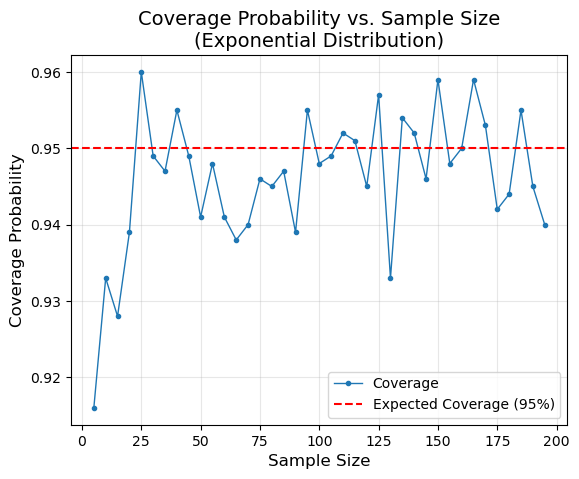

In [58]:
plt.plot(sample_sizes, coverages,  marker='o', markersize=3, linewidth=1, label="Coverage")

# Add labels and title
plt.xlabel("Sample Size", fontsize=12)
plt.ylabel("Coverage Probability", fontsize=12)
plt.title("Coverage Probability vs. Sample Size\n(Exponential Distribution)", fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label="Expected Coverage (95%)")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

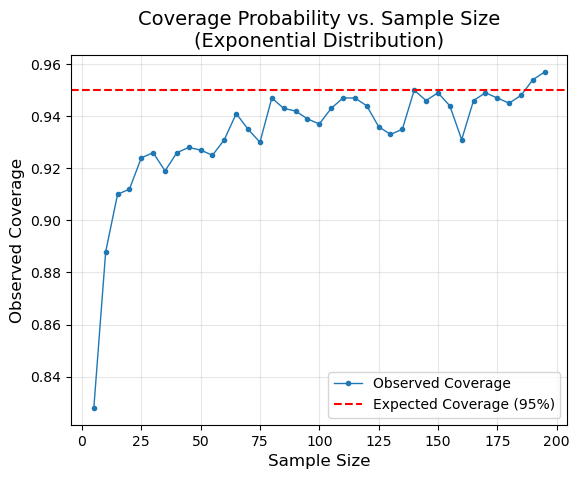

In [61]:
plt.plot(sample_sizes, coverages,  marker='o', markersize=3, linewidth=1, label="Observed Coverage")

# Add labels and title
plt.xlabel("Sample Size", fontsize=12)
plt.ylabel("Observed Coverage", fontsize=12)
plt.title("Coverage Probability vs. Sample Size\n(Exponential Distribution)", fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label="Expected Coverage (95%)")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

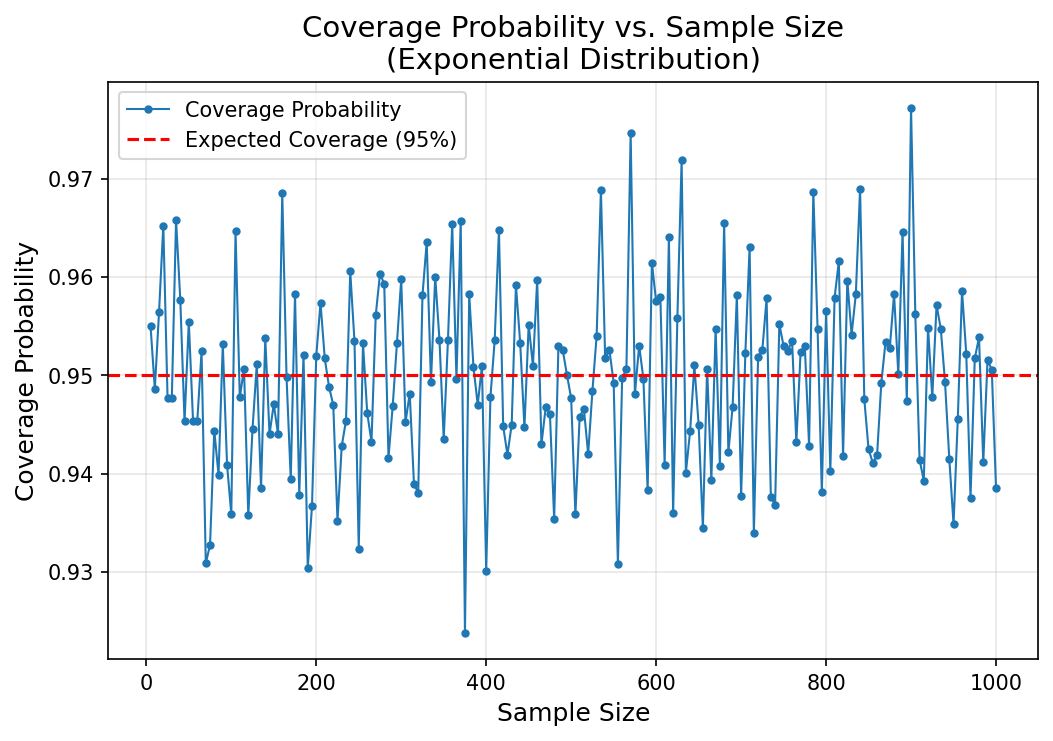

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample sizes
sample_sizes = np.arange(5, 1001, 5)

# Simulate coverage probabilities (example: actual probabilities would come from your simulation)
np.random.seed(42)  # For reproducibility
coverage_probabilities = [np.random.normal(loc=0.95, scale=0.01) for _ in sample_sizes]

# Plot
plt.figure(figsize=(8, 5), dpi=150)  # Higher DPI for clarity
plt.plot(sample_sizes, coverage_probabilities,




In [120]:
df = pd.DataFrame()
df['width_regular'] = 0
df['width_boot'] = 0
df['sample_size'] = 0
df_len = 0
for j in range(len(width_reg)):
    width_r = width_reg[j][0]
    width_b = width_boot[j][0]
    s_r = width_reg[j][1]
    s_b = width_boot[j][1]

    df.loc[df_len, 'width_regular'] = width_r 
    df.loc[df_len, 'width_boot'] = width_b
    df.loc[df_len, 'sample_size'] = s_r
    df_len += 1

IndexError: list index out of range

In [125]:
width_boot

[(8.723026774773055, 10),
 (7.808465719499544, 10),
 (9.511856150936898, 10),
 (16.37120305560389, 10),
 (7.42285813585719, 10),
 (16.520386667982194, 10),
 (9.088098947299798, 10),
 (9.925371903955494, 10),
 (12.823632517920025, 10),
 (13.079111927522659, 10),
 (12.218324587842535, 10),
 (17.047239657313163, 10),
 (14.754101424531111, 10),
 (12.788246007948093, 10),
 (17.639467455811435, 10),
 (12.550256618758954, 10),
 (10.685714179653221, 10),
 (9.234035961400746, 10),
 (16.6555198349077, 10),
 (6.869714768747898, 10),
 (19.77589608215805, 10),
 (7.506651811829502, 10),
 (9.330130954272734, 10),
 (12.515279718823155, 10),
 (5.925818350351308, 10),
 (9.862307910806084, 10),
 (9.901090269446414, 10),
 (10.037876161528008, 10),
 (6.303166758354256, 10),
 (12.474617962442169, 10),
 (8.62497790455716, 10),
 (7.765020225437845, 10),
 (13.559032944421578, 10),
 (7.5031338743849325, 10),
 (7.74581084451704, 10),
 (11.554679751403892, 10),
 (13.759192904090433, 10),
 (14.513230066796826, 10)

In [107]:
df = pd.DataFrame()

for j in range(6):
    sample_size_reg = width_reg[j]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [15]:
# result_df = pd.DataFrame()

# for j, result in enumerate(results):
#     dist = result[0]
#     size = result[1]
#     coverage_ = result[2]

#     result_df.loc[j, 'distribution'] = dist
#     result_df.loc[j, 'sample size'] = size
#     result_df.loc[j, 'coverage'] = coverage_


In [ ]:
result_df.to_csv('results_pt2.csv')

In [ ]:
result_df.sort_values(by='sample size')

,distribution,sample size,coverage
0,uniform,10.0,0.952
14,exponential,10.0,0.883
7,bimodal,10.0,0.917
1,uniform,30.0,0.945
15,exponential,30.0,0.921
8,bimodal,30.0,0.931
2,uniform,40.0,0.931
16,exponential,40.0,0.932
9,bimodal,40.0,0.936
17,exponential,50.0,0.931


In [ ]:
Distribution = ['p']
names = ['normal']
expected_values = [0]
sample_sizes = [10, 30, 40, 50, 75, 150, 1000]
iterations = 1000
results_norm = [] # will contain (dist, size, coverage) tuples
for dist, expected_val, name in zip(Distribution, expected_values, names):
    for size in sample_sizes:
        coverage = 0.0
        tvalue = t_value(size, 0.95)
        for j in tqdm(range(iterations)):
            if name == 'exponential':
                sample = np.random.exponential(scale=1, size=size)
            else:
                sample = np.random.normal(loc=0, scale=1, size=size)
            mean = np.mean(sample)
            std = np.std(sample)
            lower_bound = mean - tvalue*(std/np.sqrt(size))
            upper_bound = mean + tvalue*std/np.sqrt((size))
            if expected_val > lower_bound and expected_val < upper_bound:
                coverage += 1
        coverage_prob = coverage/iterations
        results_norm.append((name, size, coverage_prob))
        print(results_norm)
        print('---')


100%|██████████| 1000/1000 [00:00<00:00, 42736.66it/s]


[('normal', 10, 0.922)]
---


100%|██████████| 1000/1000 [00:00<00:00, 51392.60it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945)]
---


100%|██████████| 1000/1000 [00:00<00:00, 53436.07it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952)]
---


100%|██████████| 1000/1000 [00:00<00:00, 44169.63it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956)]
---


100%|██████████| 1000/1000 [00:00<00:00, 63500.03it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956), ('normal', 75, 0.951)]
---


100%|██████████| 1000/1000 [00:00<00:00, 61705.44it/s]


[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956), ('normal', 75, 0.951), ('normal', 150, 0.946)]
---


100%|██████████| 1000/1000 [00:00<00:00, 32648.63it/s]

[('normal', 10, 0.922), ('normal', 30, 0.945), ('normal', 40, 0.952), ('normal', 50, 0.956), ('normal', 75, 0.951), ('normal', 150, 0.946), ('normal', 1000, 0.956)]
---


In [ ]:
# Distribution = ['p']
# names = ['normal']
# expected_values = [0]
# sample_sizes = [10, 30, 40, 50, 75, 150]
# iterations = 1000
# results_norm = [] # will contain (dist, size, coverage) tuples
# reps = 100
# for dist, expected_val, name in zip(Distribution, expected_values, names):
#     for size in sample_sizes:
#         tvalue = t_value(size, 0.95)
#         for rep in tqdm(range(reps)):
#             coverage_mean = []
#             coverage = 0.0
#             for j in range(iterations):
#                 if name == 'exponential':
#                     sample = np.random.exponential(scale=1, size=size)
#                 else:
#                     sample = np.random.normal(loc=0, scale=1, size=size)
#                 mean = np.mean(sample)
#                 std = np.std(sample)
#                 lower_bound = mean - tvalue*(std/np.sqrt(size))
#                 upper_bound = mean + tvalue*std/np.sqrt((size))
#                 if expected_val > lower_bound and expected_val < upper_bound:
#                     coverage += 1
#             coverage_mean.append(coverage/iterations)
#         results_norm.append((name, size, np.mean(coverage_mean)))
#         print(results_norm)
#         print('---')


In [ ]:
result_df.to_csv('result_first_go.csv')

In [ ]:
# coverage of confidence intervals
coverage = [] # will add 1 to list if mu is within confidence bounds
conf_intervals = []
iterations = 100
sample_size = 500
tvalue = t_value(sample_size, 0.95)
for j in range(iterations):
  sample = np.random.exponential(scale=1, size=100)
  mean = np.mean(sample)
  std = np.std(sample)
  lower_bound = mean - tvalue*(std/np.sqrt(sample_size))
  upper_bound = mean + tvalue*std/np.sqrt((sample_size))
  if 0 > lower_bound and 0 < upper_bound:
    coverage.append(1)
  conf_intervals.append((lower_bound, upper_bound))

print(f'Coverage Probability: {len(coverage)/iterations}')

Coverage Probability: 0.0


0.9640615565620831


<Axes: ylabel='Count'>

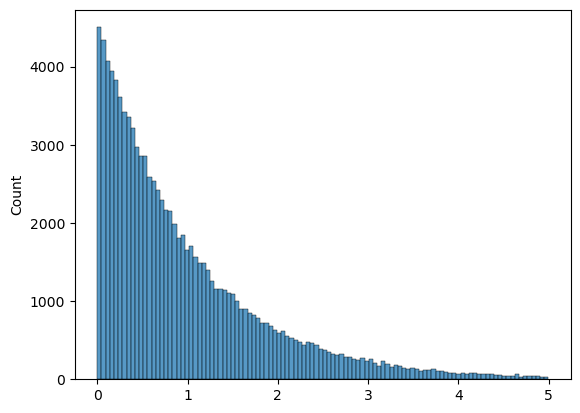

In [ ]:
samples = accept_reject(exponential_density, 100000)
print(np.mean(samples))

sns.histplot(samples)

In [112]:
iterations = 1000

coverage = 0.0

for iter in range(iterations):
    sample = np.random.exponential(1, size=sample_size)
    mean = np.mean(sample)
    lower = 2*mean/3.42
    upper = 2*mean/0.96
    if lower < 1 and upper > 1:
        coverage += 1

print(coverage/iterations)

0.955


In [154]:
st.gamma.ppf(.975, a=10, scale=2/10)

3.416960690283833

In [157]:
sample_sizes = list(range(2, 50, 1))

coverages = []
for sample_size in sample_sizes:
    a = st.gamma.ppf(.025, a=sample_size, scale=2/sample_size)
    b = st.gamma.ppf(.975, a=sample_size, scale=2/sample_size)
    coverage = 0.0
    for j in tqdm(range(iterations)):
        sample = np.random.exponential(1, size=sample_size)
        mean = np.mean(sample)
        lower = 2*mean/b
        upper = 2*mean/a
        if lower < 1 and upper > 1:
            coverage += 1
    coverages.append(coverage/iterations)
        

100%|██████████| 1000/1000 [00:00<00:00, 157485.23it/s]


In [ ]:
k = pd.DataFrame()
k['Sam'] = sample_sizes


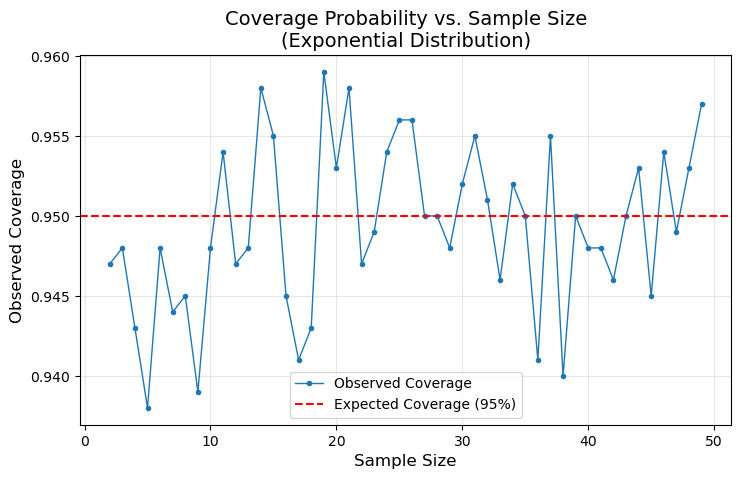

In [176]:
plt.figure(figsize=(8.4, 4.8))
plt.plot(sample_sizes, coverages,  marker='o', markersize=3, linewidth=1, label="Observed Coverage")

# Add labels and title
plt.xlabel("Sample Size", fontsize=12)
plt.ylabel("Observed Coverage", fontsize=12)
plt.title("Coverage Probability vs. Sample Size\n(Exponential Distribution)", fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label="Expected Coverage (95%)")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.savefig('exact_exp.png')
plt.show()


1.88660080686928
2.1405272314467507
mean: 1.9992808486420468
var: 0.004176131952245178
calced var: 0.004
ShapiroResult(statistic=0.9939957761272565, pvalue=0.04552689215619494)


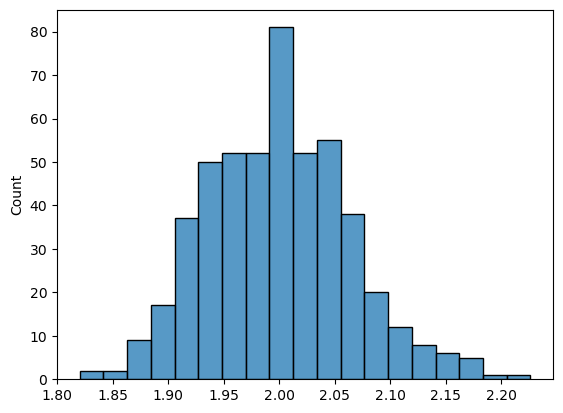

In [148]:
import scipy.stats as st
sample_size = 1000
gamma_s = np.random.gamma(sample_size, 2/sample_size, size=500)

print(np.percentile(gamma_s, 2.5))
print(np.percentile(gamma_s, 97.5))
sns.histplot(gamma_s)
print(f'mean: {np.mean(gamma_s)}')
print(f'var: {np.var(gamma_s)}')
print(f'calced var: {4/sample_size}')

print(st.shapiro(gamma_s))